In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at C:\Users\Dell\AppData\Local\Temp\matplotlib-ik_vem39 because the default path (C:\Users\Dell\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data_test = pd.read_csv('data/train.csv')
data_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(data_test.shape)

(1460, 81)


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
missing_data = data_test.isna().sum()
missing_percentage = (missing_data / len(data_test)) * 100

missing_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [6]:
miss = data_test.isna().sum()
perc = list((missing_data / len(data_test)) * 100)
i = 0
new_l = []
cols = []
dec = {}
for p in perc:
    if p != 0.0:
        dec[data_test.columns[i]] = np.round(p, 2)
    i += 1

print(dec)
# print(list(miss))
# print(list(data_train.columns))

{'LotFrontage': 17.74, 'Alley': 93.77, 'MasVnrType': 59.73, 'MasVnrArea': 0.55, 'BsmtQual': 2.53, 'BsmtCond': 2.53, 'BsmtExposure': 2.6, 'BsmtFinType1': 2.53, 'BsmtFinType2': 2.6, 'Electrical': 0.07, 'FireplaceQu': 47.26, 'GarageType': 5.55, 'GarageYrBlt': 5.55, 'GarageFinish': 5.55, 'GarageQual': 5.55, 'GarageCond': 5.55, 'PoolQC': 99.52, 'Fence': 80.75, 'MiscFeature': 96.3}


In [7]:
new_data = data_test.drop(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [8]:
miss = data_test.isna().sum()
i = 0
dec = {}
l = []
for col in new_data.columns:
    # dec[new_data[col].dtype] = (new_data[col].isna().sum())
    n = (new_data[col].isna().sum() / len(new_data)) * 100
    t = (new_data[col].dtype, np.round(n, 2))
    l.append(t)

print(l)

[(dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('O'), 0.0), (dtype('int64'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('float64'), 0.55), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 2.53), (dtype('O'), 2.53), (dtype('O'), 2.6), (dtype('O'), 2.53), (dtype('int64'), 0.0), (dtype('O'), 2.6), (dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.0), (dtype('O'), 0.07), (dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('int64'), 0.0), (dtype('int64'), 0.0), 

In [9]:
dic = {}
for col in new_data.columns:
    if new_data[col].dtype == 'object':
        dic[col] = new_data[col].nunique()

dic

{'MSZoning': 5,
 'Street': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinType2': 6,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 'KitchenQual': 4,
 'Functional': 7,
 'GarageType': 6,
 'GarageFinish': 3,
 'GarageQual': 5,
 'GarageCond': 5,
 'PavedDrive': 3,
 'SaleType': 9,
 'SaleCondition': 6}

In [10]:
new_data = new_data.drop(['Id', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType', 'RoofMatl', 'HouseStyle', 'Condition1', 'Condition2'], axis=1)

In [11]:
new_data.nunique()

MSSubClass         15
MSZoning            5
LotArea          1073
Street              2
LotShape            4
                 ... 
MiscVal            21
MoSold             12
YrSold              5
SaleCondition       6
SalePrice         663
Length: 64, dtype: int64

In [12]:
for col in new_data.columns:
    if new_data[col].dtype != 'object':
        new_data[col] = new_data[col].fillna(new_data[col].mean())
    else:
        new_data[col] = new_data[col].fillna(new_data[col].mode()[0])

new_data.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
SalePrice        0
Length: 64, dtype: int64

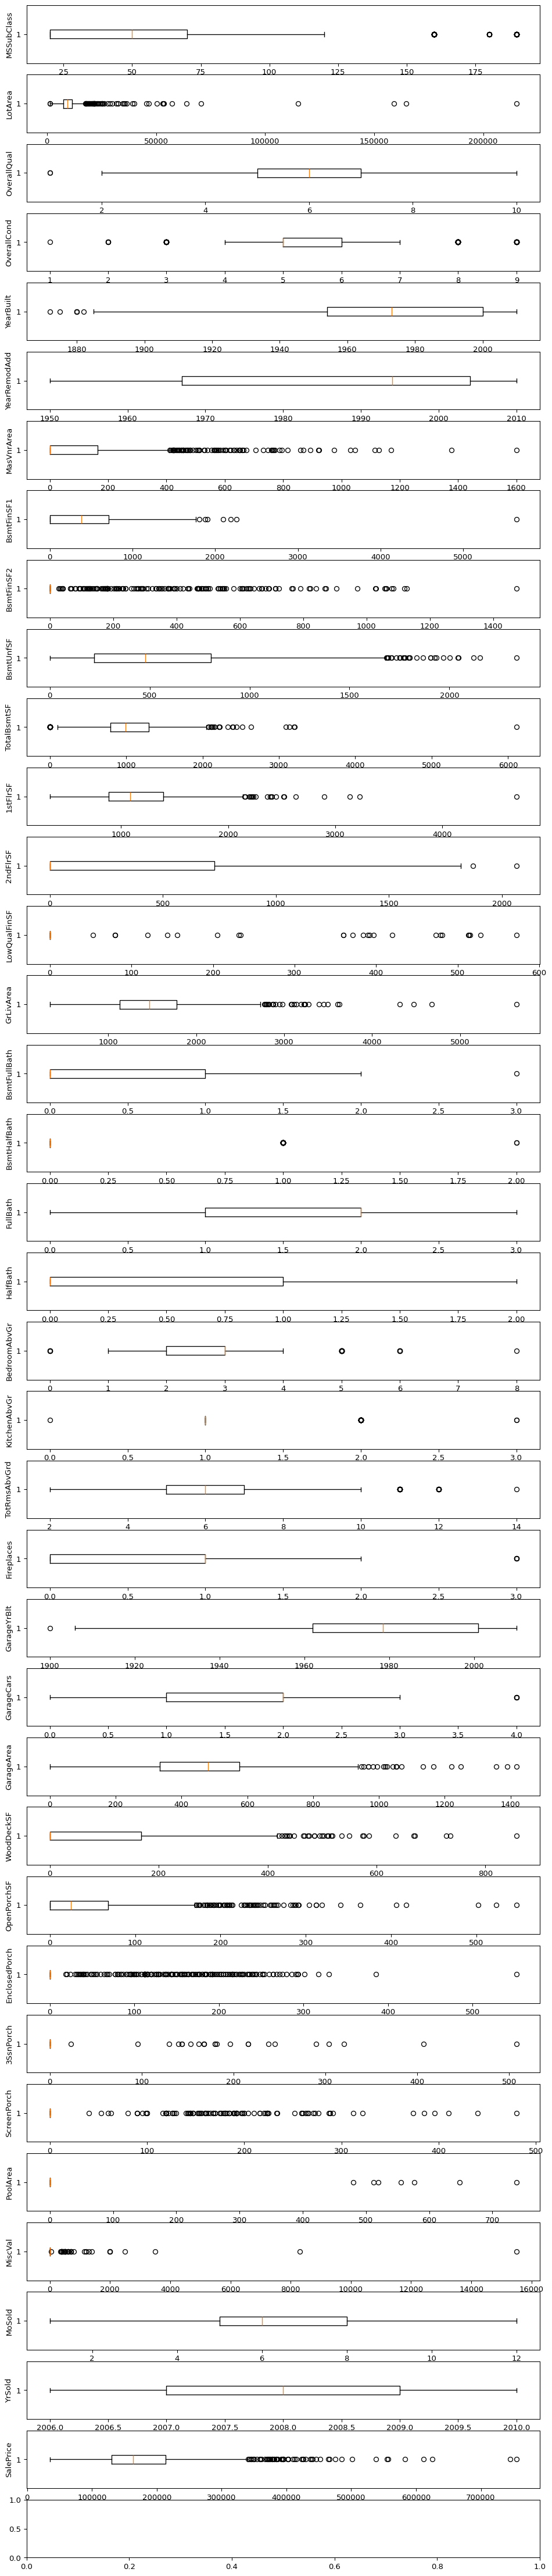

In [13]:
def show_outliers():
    fig, axs = plt.subplots(37, 1, dpi=95, figsize=(12, 60))
    i = 0
    for col in new_data.columns:
        if new_data[col].dtype != 'object':
            axs[i].boxplot(new_data[col], vert=False)
            axs[i].set_ylabel(col)
            i += 1
    plt.show()

show_outliers()

In [14]:
data_no_outliers1 = new_data.drop(['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)
data_no_outliers1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   Street         1460 non-null   object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  MasVnrArea     1460 non-null   float64
 15  ExterQual      1460 non-null   object 
 16  ExterCond      1460 non-null   object 
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [15]:
new_data = data_no_outliers1

In [16]:
new_data.shape

(1460, 54)

In [17]:
for col in new_data.columns:
    print(new_data[col].value_counts())

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2  

In [18]:
data = new_data.drop(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrArea', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', '2ndFlrSF', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotShape      1460 non-null   object 
 2   OverallQual   1460 non-null   int64  
 3   OverallCond   1460 non-null   int64  
 4   YearBuilt     1460 non-null   int64  
 5   YearRemodAdd  1460 non-null   int64  
 6   ExterQual     1460 non-null   object 
 7   Foundation    1460 non-null   object 
 8   BsmtQual      1460 non-null   object 
 9   BsmtFinType1  1460 non-null   object 
 10  BsmtFinSF1    1460 non-null   int64  
 11  BsmtUnfSF     1460 non-null   int64  
 12  TotalBsmtSF   1460 non-null   int64  
 13  HeatingQC     1460 non-null   object 
 14  1stFlrSF      1460 non-null   int64  
 15  GrLivArea     1460 non-null   int64  
 16  BsmtFullBath  1460 non-null   int64  
 17  FullBath      1460 non-null   int64  
 18  HalfBath      1460 non-null 

In [19]:
data_heatmap = data.select_dtypes(exclude=['object'])

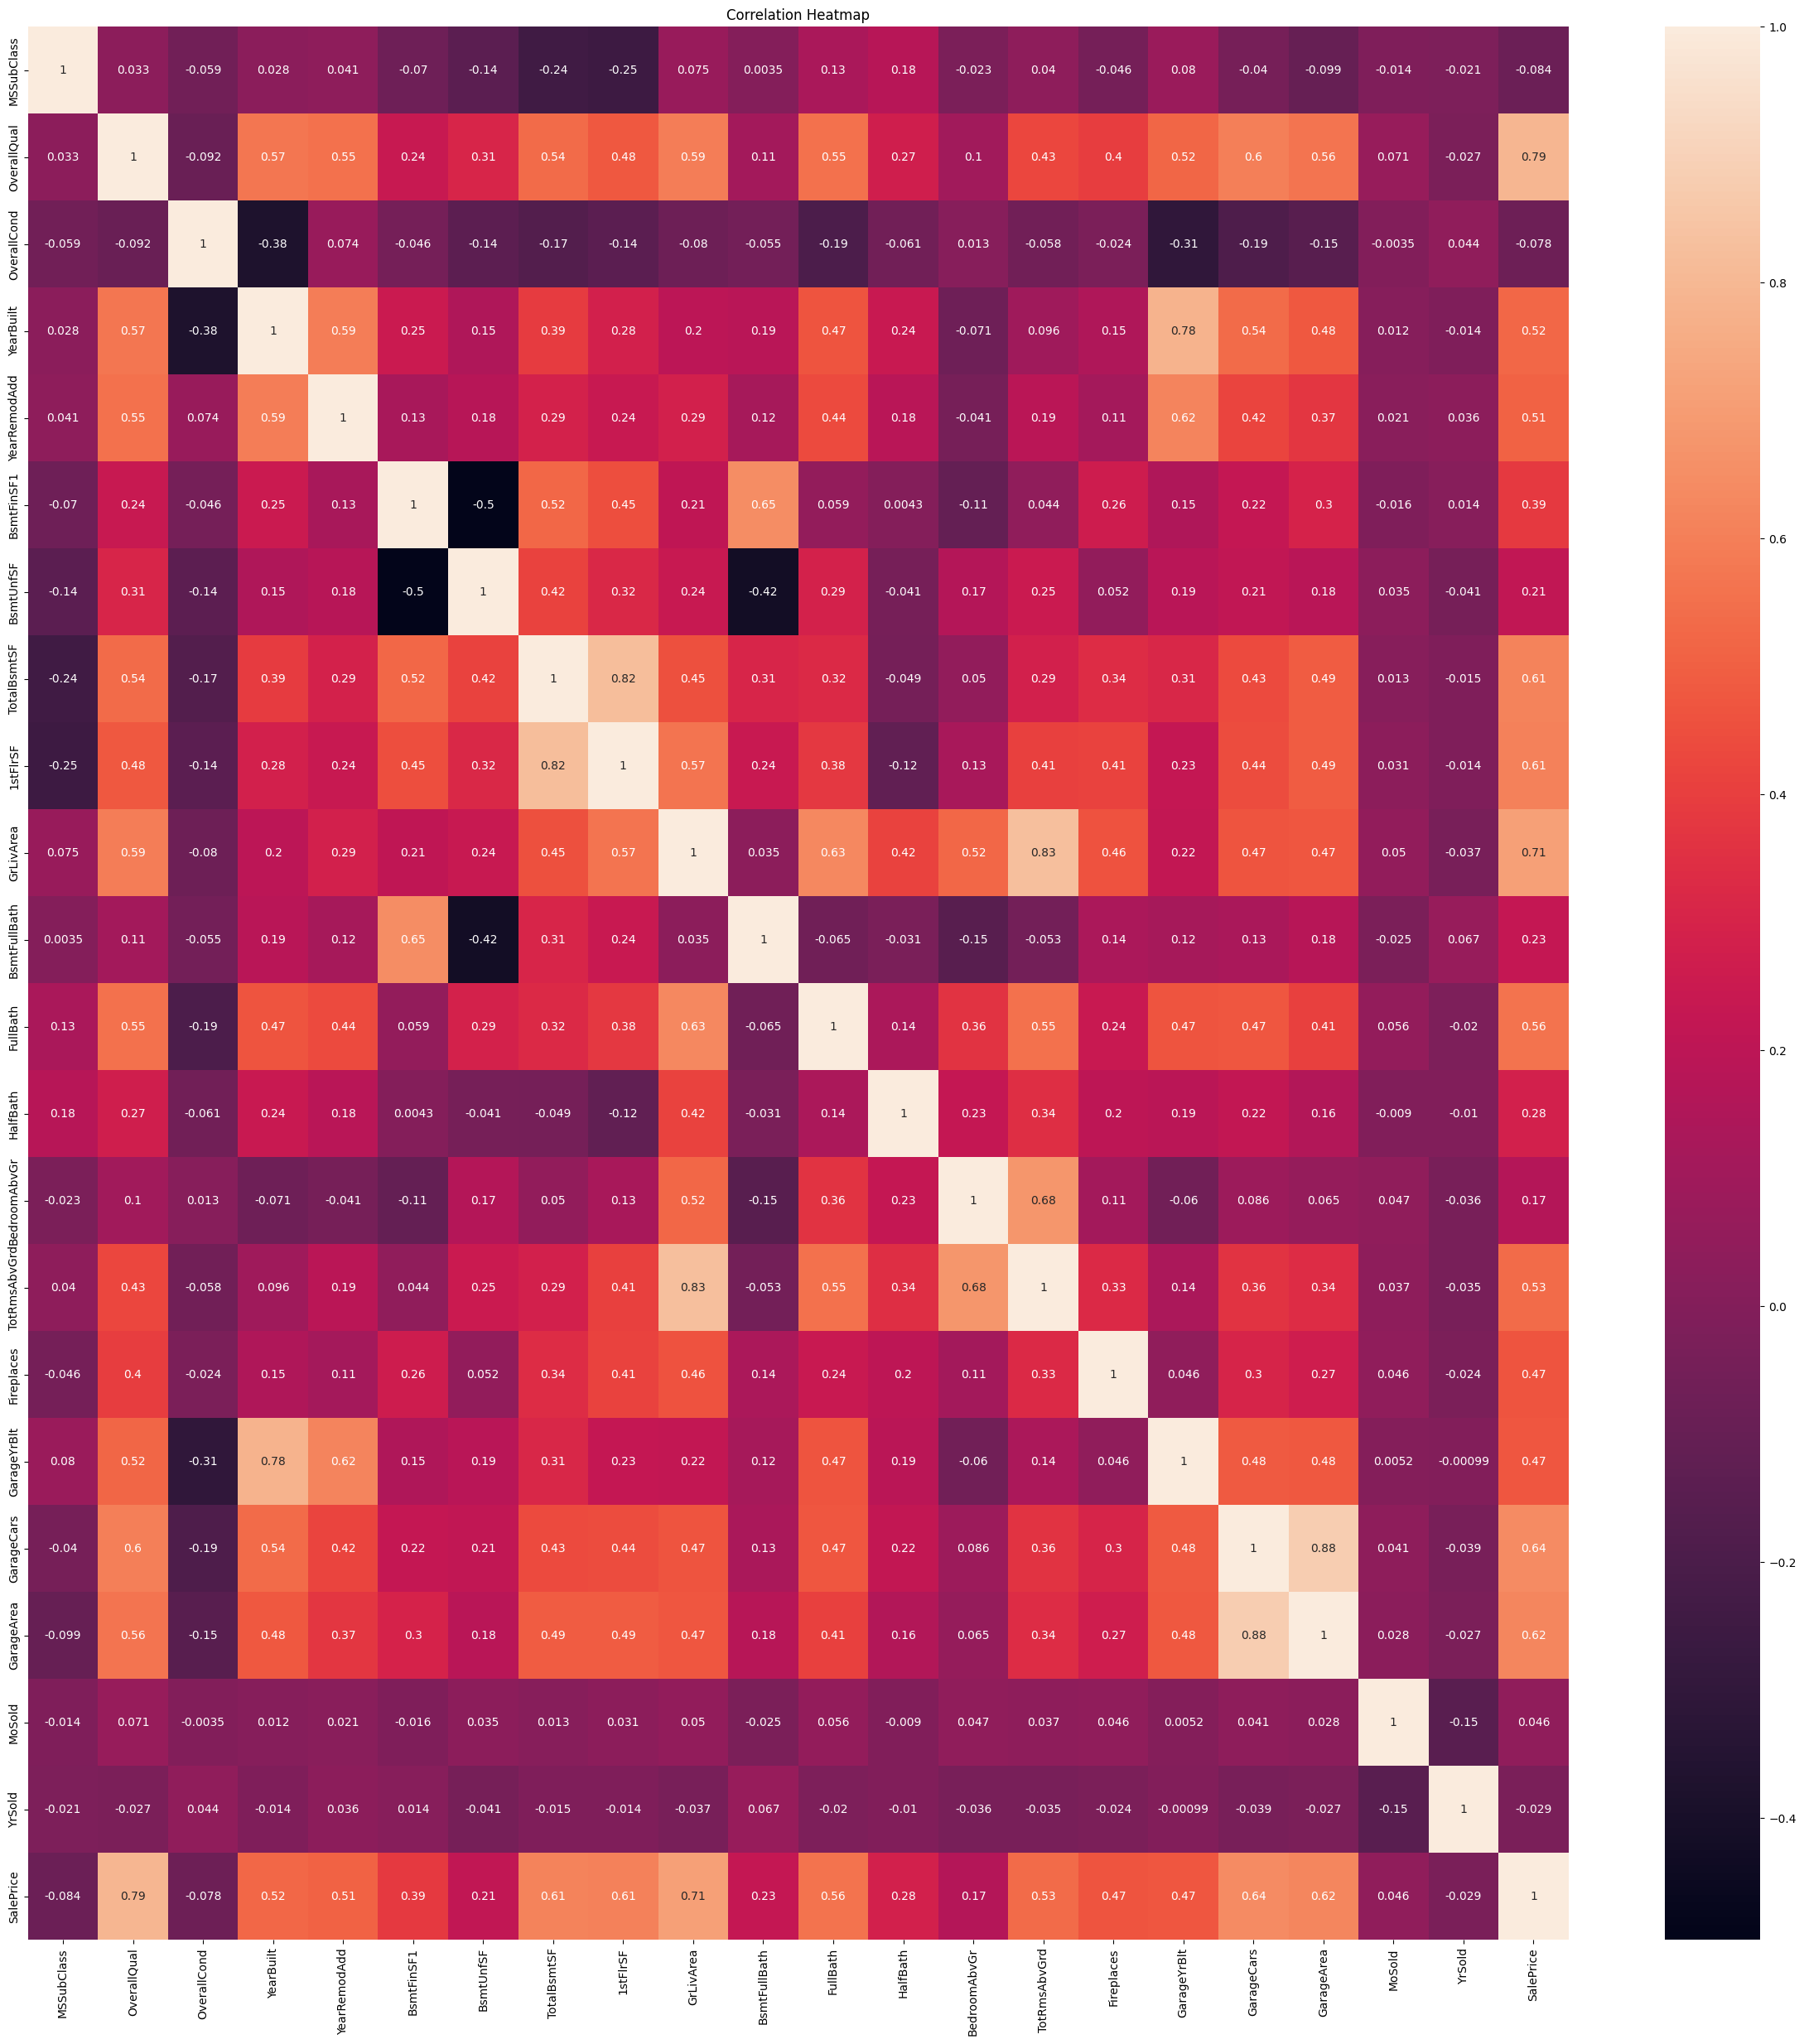

In [20]:
plt.figure(figsize=(30, 30))
sns.heatmap(data_heatmap.corr(), annot=True, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
data_heatmap.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.500000,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.500000,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.000000,1391.25,4692.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.000000,1776.75,5642.0


In [22]:
numerical_data = data_heatmap.drop('SalePrice', axis=1)
num_cols = list(numerical_data.columns)
num_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'MoSold',
 'YrSold']

In [23]:
dic = {}
for col in data.columns:
    if data[col].dtype == 'object':
        dic[col] = list(data[col].unique())

dic

{'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'Foundation': ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'],
 'BsmtQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'],
 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'GarageType': ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],
 'GarageFinish': ['RFn', 'Unf', 'Fin']}

In [24]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

ordinal_cols = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']
label_cols = ['LotShape', 'Foundation', 'BsmtFinType1', 'GarageType', 'GarageFinish']

for col in ordinal_cols:
    grades = list(data[col].unique())
    encoder = OrdinalEncoder()
    data[col] = encoder.fit_transform(data[[col]])

for col in label_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

print(data['ExterQual'])
print(data['LotShape'])

0       2.0
1       3.0
2       2.0
3       3.0
4       2.0
       ... 
1455    3.0
1456    3.0
1457    0.0
1458    3.0
1459    2.0
Name: ExterQual, Length: 1460, dtype: float64
0       3
1       3
2       0
3       0
4       0
       ..
1455    3
1456    3
1457    3
1458    3
1459    3
Name: LotShape, Length: 1460, dtype: int32


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotShape      1460 non-null   int32  
 2   OverallQual   1460 non-null   int64  
 3   OverallCond   1460 non-null   int64  
 4   YearBuilt     1460 non-null   int64  
 5   YearRemodAdd  1460 non-null   int64  
 6   ExterQual     1460 non-null   float64
 7   Foundation    1460 non-null   int32  
 8   BsmtQual      1460 non-null   float64
 9   BsmtFinType1  1460 non-null   int32  
 10  BsmtFinSF1    1460 non-null   int64  
 11  BsmtUnfSF     1460 non-null   int64  
 12  TotalBsmtSF   1460 non-null   int64  
 13  HeatingQC     1460 non-null   float64
 14  1stFlrSF      1460 non-null   int64  
 15  GrLivArea     1460 non-null   int64  
 16  BsmtFullBath  1460 non-null   int64  
 17  FullBath      1460 non-null   int64  
 18  HalfBath      1460 non-null 

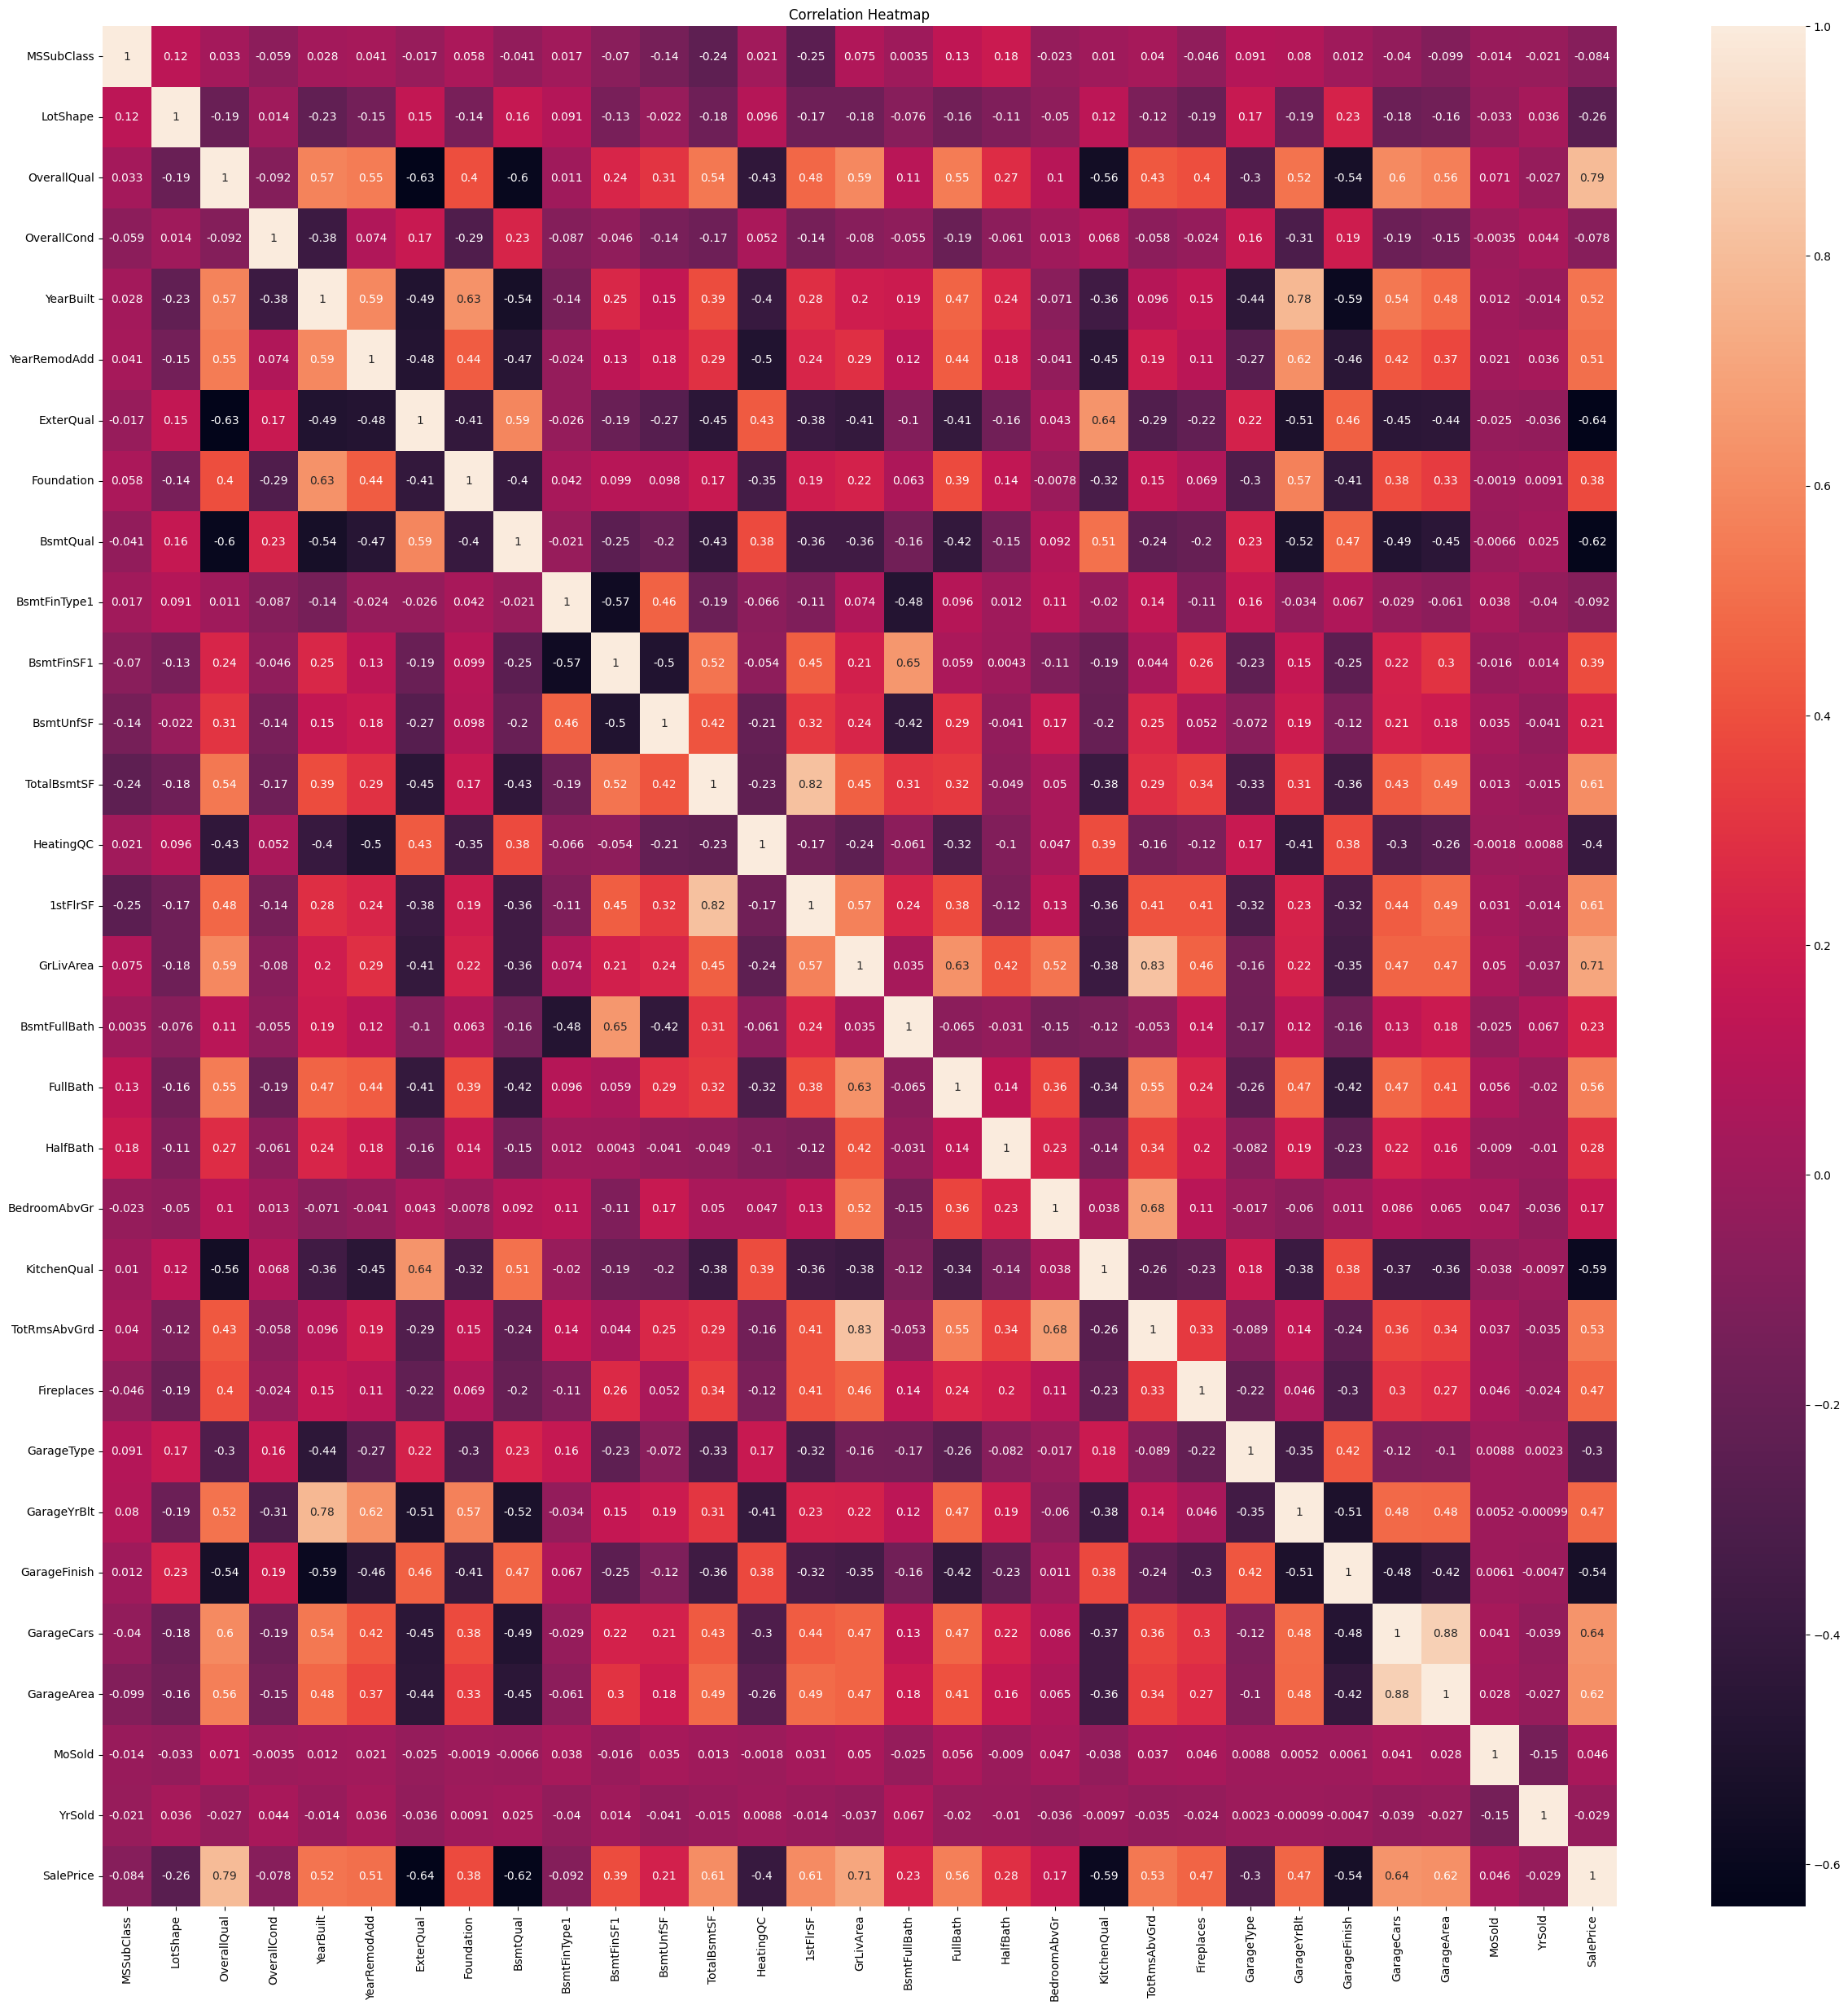

In [26]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

#### Dropping Features with low correlation with output

In [27]:
data = data.drop(['OverallCond', 'MoSold', 'YrSold', 'MSSubClass'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotShape      1460 non-null   int32  
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   ExterQual     1460 non-null   float64
 5   Foundation    1460 non-null   int32  
 6   BsmtQual      1460 non-null   float64
 7   BsmtFinType1  1460 non-null   int32  
 8   BsmtFinSF1    1460 non-null   int64  
 9   BsmtUnfSF     1460 non-null   int64  
 10  TotalBsmtSF   1460 non-null   int64  
 11  HeatingQC     1460 non-null   float64
 12  1stFlrSF      1460 non-null   int64  
 13  GrLivArea     1460 non-null   int64  
 14  BsmtFullBath  1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  HalfBath      1460 non-null   int64  
 17  BedroomAbvGr  1460 non-null   int64  
 18  KitchenQual   1460 non-null 

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LotShape,1460.0,1.942466,1.409156,0.0,0.00,3.000000,3.00,3.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
ExterQual,1460.0,2.539726,0.693995,0.0,2.00,3.000000,3.00,3.0
Foundation,1460.0,1.396575,0.722394,0.0,1.00,1.000000,2.00,5.0
BsmtQual,1460.0,2.280137,0.864510,0.0,2.00,2.000000,3.00,3.0
BsmtFinType1,1460.0,2.789726,1.837550,0.0,1.00,2.000000,5.00,5.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.500000,808.00,2336.0


### Scaling with RobustScaler to handle outliers

In [29]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

for col in data.columns:
    if data[col].dtype == 'object' or col == 'SalePrice':
        continue
    data[col] = scaler.fit_transform(data[[col]])

data.describe().T

,count,mean,std,min,25%,50%,75%,max
LotShape,1460.0,-3.525114e-01,0.469719,-1.000000,-1.000000,0.0,0.000000,0.000000
OverallQual,1460.0,4.965753e-02,0.691498,-2.500000,-0.500000,0.0,0.500000,2.000000
YearBuilt,1460.0,-3.765634e-02,0.656585,-2.195652,-0.413043,0.0,0.586957,0.804348
YearRemodAdd,1460.0,-2.468715e-01,0.557984,-1.189189,-0.729730,0.0,0.270270,0.432432
ExterQual,1460.0,-4.602740e-01,0.693995,-3.000000,-1.000000,0.0,0.000000,0.000000
Foundation,1460.0,3.965753e-01,0.722394,-1.000000,0.000000,0.0,1.000000,4.000000
BsmtQual,1460.0,2.801370e-01,0.864510,-2.000000,0.000000,0.0,1.000000,1.000000
BsmtFinType1,1460.0,1.974315e-01,0.459388,-0.500000,-0.250000,0.0,0.750000,0.750000
BsmtFinSF1,1460.0,8.443626e-02,0.640362,-0.538435,-0.538435,0.0,0.461565,7.385749
BsmtUnfSF,1460.0,1.534024e-01,0.755328,-0.816239,-0.435043,0.0,0.564957,3.176923


In [30]:
data = data.drop('GarageYrBlt', axis=1)

In [32]:
data.shape

(1460, 26)

In [31]:
data.to_csv('train_data2.csv', index=False)

In [33]:
from sklearn.model_selection import train_test_split

x = data.drop('SalePrice', axis=1)
y = data['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [34]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression()

In [35]:
lr_predictions = linear_regression.predict(x_test)

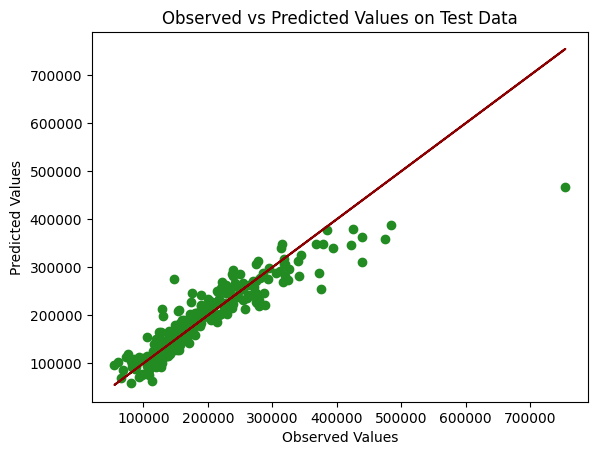

In [36]:
plt.scatter(y_test, lr_predictions, color='forestgreen', label='model prediction')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred', label='actual value') # line for perfect prediction (true values)
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, lr_predictions)
rmse = np.sqrt(mean_absolute_error(y_test, lr_predictions))
mae = mean_absolute_error(y_test, lr_predictions)
score = r2_score(y_test, lr_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Mean Squared Error: 1146464477.7408786
Root Mean Squared Error: 148.42898674572555
Mean Absolute Error: 22031.164106362776
R2 Score: 0.8414784326539895


In [38]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso()

lasso_model.fit(x_train, y_train)

lasso_predictions = lasso_model.predict(x_test)

mse = mean_squared_error(y_test, lasso_predictions)
rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
mae = mean_absolute_error(y_test, lasso_predictions)
score = r2_score(y_test, lasso_predictions)

print('Lasso Regression:')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Lasso Regression:
Mean Squared Error: 1146355042.708267
Root Mean Squared Error: 33857.86530052163
Mean Absolute Error: 22029.97987446121
R2 Score: 0.841493564228695


In [39]:
ridge_model = Ridge()

ridge_model.fit(x_train, y_train)

rigde_predictions = ridge_model.predict(x_test)

mse = mean_squared_error(y_test, rigde_predictions)
rmse = np.sqrt(mean_squared_error(y_test, rigde_predictions))
mae = mean_absolute_error(y_test, rigde_predictions)
score = r2_score(y_test, rigde_predictions)

print('Ridge Regression')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Ridge Regression
Mean Squared Error: 1146616716.0412538
Root Mean Squared Error: 33861.72937168528
Mean Absolute Error: 22028.333616757747
R2 Score: 0.8414573826742875


### Choosing Linear Regression

In [45]:
test_data = pd.read_csv('test_data2.csv')
test_data.shape

(1460, 26)

In [47]:
test_data.head(10)

,LotShape,OverallQual,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,...,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,SalePrice
0,0.0,0.5,0.652174,0.243243,-1.0,1.0,0.0,0.00,0.452790,-0.559829,...,1.0,0.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.281573,208500
1,0.0,0.0,0.065217,-0.486486,0.0,0.0,0.0,-0.50,0.834679,-0.330769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.082816,181500
2,-1.0,0.5,0.608696,0.216216,-1.0,1.0,0.0,0.00,0.143910,-0.074359,...,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.530021,223500
3,-1.0,0.5,-1.260870,-0.648649,0.0,-1.0,1.0,-0.50,-0.235170,0.106838,...,0.0,0.0,-1.0,0.5,0.0,1.0,1.0,1.0,0.670807,140000
4,-1.0,1.0,0.586957,0.162162,-1.0,1.0,0.0,0.00,0.381186,0.021368,...,1.0,1.0,-1.0,1.5,0.0,0.0,0.0,1.0,1.474120,250000
5,-1.0,-0.5,0.434783,0.027027,0.0,4.0,0.0,0.00,0.489294,-0.706838,...,1.0,-2.0,0.0,-0.5,-1.0,0.0,1.0,0.0,0.000000,143000
6,0.0,1.0,0.673913,0.297297,-1.0,1.0,-2.0,0.00,1.383643,-0.274359,...,0.0,0.0,-1.0,0.5,0.0,0.0,0.0,0.0,0.645963,307000
7,-1.0,0.5,0.000000,-0.567568,0.0,0.0,0.0,-0.50,0.667603,-0.447009,...,1.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.016563,200000
8,0.0,0.5,-0.913043,-1.189189,0.0,-1.0,1.0,0.75,-0.538435,0.811111,...,0.0,-1.0,0.0,1.0,1.0,1.0,1.0,0.0,-0.049689,129900
9,0.0,-0.5,-0.739130,-1.189189,0.0,-1.0,1.0,0.00,0.656371,-0.576923,...,0.0,-1.0,0.0,-0.5,1.0,0.0,0.0,-1.0,-1.138716,118000


In [48]:
actual = test_data['SalePrice']
test_data = test_data.drop('SalePrice', axis=1)

In [54]:
predictions = linear_regression.predict(test_data)

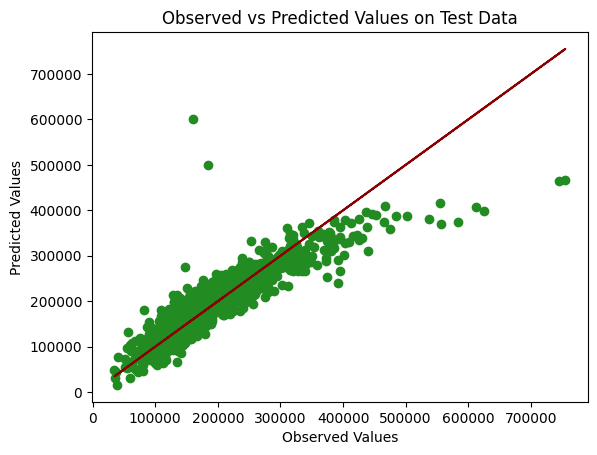

In [55]:
plt.scatter(actual, predictions, color='forestgreen', label='model prediction')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(actual, actual, color='darkred', label='actual value') # line for perfect prediction (true values)
plt.show()

In [56]:
mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mean_absolute_error(actual, predictions))
mae = mean_absolute_error(actual, predictions)
score = r2_score(actual, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Mean Squared Error: 1181085905.78954
Root Mean Squared Error: 146.8992821868617
Mean Absolute Error: 21579.39910701523
R2 Score: 0.812727842418373


In [61]:
predictions_2 = ridge_model.predict(test_data)

mse = mean_squared_error(actual, predictions_2)
rmse = np.sqrt(mean_squared_error(actual, predictions_2))
mae = mean_absolute_error(actual, predictions_2)
score = r2_score(actual, predictions_2)

print('Ridge Regression')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Ridge Regression
Mean Squared Error: 1181121966.09348
Root Mean Squared Error: 34367.455042430476
Mean Absolute Error: 21572.595894651666
R2 Score: 0.8127221247217273


In [57]:
start_id = 1461
ids = list(range(start_id, start_id + len(predictions)))

submission = pd.DataFrame({
    'Id': ids,
    'SalePrice': predictions
})

submission

,Id,SalePrice
0,1461,223223.885430
1,1462,175882.080699
2,1463,231138.745845
3,1464,208040.316855
4,1465,285946.703058
...,...,...
1455,2916,177437.008635
1456,2917,221702.561371
1457,2918,242407.469523
1458,2919,131483.749373


In [59]:
submission = submission.drop(index=submission.index[-1], axis=0)
submission

,Id,SalePrice
0,1461,223223.885430
1,1462,175882.080699
2,1463,231138.745845
3,1464,208040.316855
4,1465,285946.703058
...,...,...
1454,2915,200927.461972
1455,2916,177437.008635
1456,2917,221702.561371
1457,2918,242407.469523


In [60]:
submission.to_csv('submission.csv', index=False)